Summarizing across multiple data frames
======================

The problem: Experimental data from a series of readings from a plate is contained in a set of [Pandas](http://pandas.pydata.org/) dataframes. For each of 4 wells (A, B, C and D) on the plate, there is a mean and sem value. There are 4 readings from the plate. We want to be able to analyse data from each well. The question is how to deal with this 3-D data set using the 2-D dataframe in Pandas.

We'll start by creating some mock data where each experiment is in a dataframe and the dataframes are in a list called `data`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = list()
for i in range(4):
    mean = (i+1)*np.arange(1, 5)
    sem = np.ones(4)
    df = pd.DataFrame(None, index=['A', 'B', 'C', 'D'])
    df['mean'] = mean
    df['sem'] = sem
    data.append(df)

What we are going to do is to create a new dataframe with an additional field that we will call 'trial' and combine the data into that dataframe. Once the data is aggregated, we can use the `groupby` and `get_group` functions to pull out the data for each well. For this demonstration, we will just plot the data.

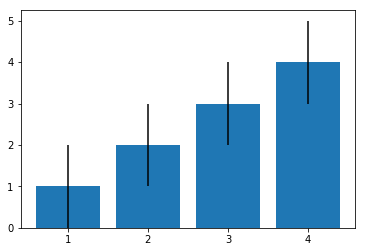

In [2]:
summary = pd.DataFrame()
for i, df in enumerate(data):
    df['trial'] = i + 1
    summary = summary.append(df)
    
group_A = summary.groupby(summary.index).get_group('A')
mean = group_A['mean']
sem = group_A['sem']
labels = group_A['trial']
plt.bar(range(len(mean)), mean, yerr=sem, tick_label=labels)
plt.show()